In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re

def bersihkan_teks(teks):
    # Menghapus simbol dan ikon percakapan
    teks_bersih = re.sub(r'@[A-Za-z0-9_]+', '', teks)  # Menghapus mention
    teks_bersih = re.sub(r'#', '', teks_bersih)  # Menghapus tanda pagar
    teks_bersih = re.sub(r'RT[\s]+', '', teks_bersih)  # Menghapus retweet
    teks_bersih = re.sub(r'https?://\S+', '', teks_bersih)  # Menghapus tautan
    teks_bersih = re.sub(r'&amp;', '', teks_bersih)  # Menghapus simbol HTML untuk '&'
    teks_bersih = re.sub(r'[^\x00-\x7F]+', '', teks_bersih)  # Menghapus karakter non-ASCII
    teks_bersih = re.sub(r'\n', '', teks_bersih)  # Menghapus karakter newline

    return teks_bersih


In [ ]:
# Membaca teks dari file input
nama_file_input = '/content/drive/MyDrive/Colab Notebooks/cleaning_txt/cigombong.txt'
nama_file_output = '/content/drive/MyDrive/Colab Notebooks/cleaning_txt/cigombong-bersih.txt'

with open(nama_file_input, 'r', encoding='utf-8') as file_input:
    teks_twitter = file_input.read()

# Membersihkan teks
teks_bersih = bersihkan_teks(teks_twitter)

# Menulis teks bersih ke file output
with open(nama_file_output, 'w', encoding='utf-8') as file_output:
    file_output.write(teks_bersih)

print("Data berhasil dibersihkan dan disimpan di", nama_file_output)


Data berhasil dibersihkan dan disimpan di /content/drive/MyDrive/Colab Notebooks/cleaning_txt/cigombong-bersih.txt


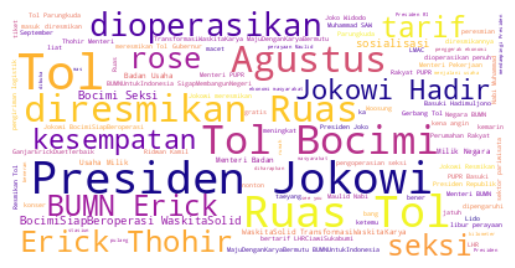

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Baca data teks
text = open(nama_file_output, "r").read()

#stop word
my_file = open("/content/drive/MyDrive/Colab Notebooks/cleaning_txt/id.stopwords.02.01.2016.txt", "r")
data = my_file.read()
# replacing end splitting the text
# when newline ('\n') is seen.
data_into_list = data.split("\n")
custom_stopwords = ['klapanunggal','ciawi','sukabumi','cibadak','sukabumi','bojonggede','cigombong','kemang','ciseeng','rancabungur','gunungsindur','polsekparung','polsek','parung','bayubaskara','barayabayubaskara','bayu','baskara','citayam','tajurhalang','tenjolaya','parung','indonesia','cileungsi','cariu','sukamakmur','gunungputri','klapanunggal','sukaraja','ciampea','rumpin','tanjungsari','tenjo','tamansari','warga','P','K','S','cijeruk','cisarua','selasa','jakarta','caringin','mensosialisasikan','bandung','dihadiri','kegiatan','selesai','laksanakan','dramaga','giat','amp','enak','biar','alhamdulillah','besok','abis','yogya','pp','dri','pl','beda','adakah','btw','kek','ni','gamau','guy','bjir','sore','bgr','skrg','w','ak','sm','dimana','anjir','sender','yaa','gatau','pake','ko','cantik','sumpah','trs','lo','doang','kalo','punten','nder','kangen','gk','kl','kah','deh','pj','lalin','arah','jalur','pengecekan','arus','wkwkwk','pulau','sempu','ditemukan','via','calondpdjabar','arus lalin','domisili','calon','dpd','desember','dpd jabar','lintas','kapolda','jabar','pengecekan arus','malam','malang','operasi','via calondpdjabar','rangka','megap','dpr','lilin','informasi selengkapnya','hubungi','gitu','selengkapnya hubungi','hubungi team','orang','terima kasih','jam','selamat malam',"jum'at",'coba','polsekjasinga','deket','rutin','polripresisi','bikin','II','III','emang','mah','gt','si','pas','yuk','ccm','the','banget','eh','minggu','the unity','unity','jd','nih','dr','lu','kak','tau','gua','lg','org','dom','dijemput','sy','halo','dah','wkwk','gini','udh','sih','tuh','jg','tolong','langsung','a5','loc','by','min','info','with','oppo','me','mohon','full_text','text','memenuhi','maaf','memenuhi','kebangun','jan','jl','humaspolresbogor','februari','dm','bgt','klo','gw','ga','iya','tp','wa','R','loh','melaksanakan','polresbogorhadir','ketahui','jalan','aksi','udah','sampe','gue', 'gak','wib','km','kalo','gunung', 'putri','gunung putri','kab','sukajaya', 'kec','januari','wilayah','pagi','april','jawa','barat','jumat','dilaksanakan','jawa barat','anang','hermansyah','anang hermansyah','dprian','daerah','bogor','jonggol','kecamatan','kabupaten','sebuah','dan','kabupatenbogor','desa','senin','tanggal','yg','gak','nya','ya','kota','aja','tag','akusihyes']
new_stopwords = data_into_list + custom_stopwords

#Buat wordcloud
wordcloud = WordCloud(background_color="white", stopwords= new_stopwords, max_words=100, max_font_size=40, colormap='plasma').generate(text)

# Tampilkan wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()